
# Exploratory Data Analysis Notebook

This notebook is going to be comprised of several different sections:

1. Reading and cleaning the data from CSV file
2. Dataframe seperation stuff age height weight
3. Understanding our research group (n=126) population visually, representing their demographics in terms of gender, age, preferred climbing discipline and something else??
4. Something else
5. Something else lol


In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction Section

For our data analysis, I wanted to start by trying to understand our research group by representing some basic demographics
To represent this, a series of charts were created, visualizing information such as gender, age, and preferred climbing disciplines.



In [115]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
#take seperate entries for male and female


## Pieplot for Gender



<AxesSubplot:ylabel='Gender'>

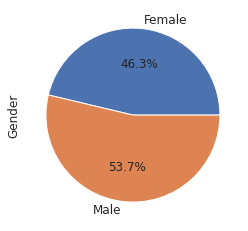

In [116]:
#pandas
gender_df = dataframe['SEX'].dropna().to_frame()
gender_pie = gender_df.groupby(by='SEX').size()
# print(gender_pie)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=12, label="Gender")
# dataframe.value_counts('SEX').plot.pie()


Text(0.5, 1.0, 'Gender')

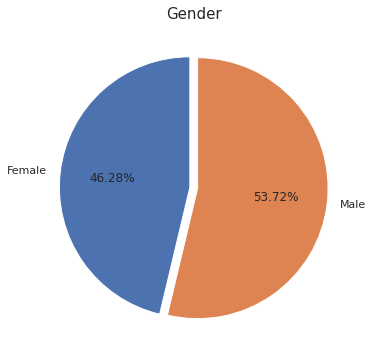

In [117]:
#matplotlib
pie, ax = plt.subplots(figsize=[10, 6])
gen_labels = gender_pie.keys()
plt.pie(x=gender_pie, autopct="%.2f%%", explode=[0.03]*2, labels=gen_labels, pctdistance=0.6, startangle = 90 )
plt.title("Gender", fontsize=15)
# pie.savefig("Gender.png")


## Pieplot for Ages
Set bins for ages

(Text(0.5, 0, 'Age Groups'), Text(0, 0.5, 'Age Groups'))

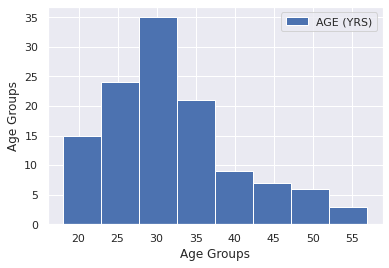

In [118]:
age_df = dataframe['AGE (YRS)'].dropna().to_frame()
# age_bins = ['18-23','23-28','29-33','33-38','39-43','44-48','49-53','54+']

age_hist = age_df.plot(kind='hist',bins=8,range=[18,57])
age_hist.set_xlabel('Age Groups'), age_hist.set_ylabel('Age Groups')

# age_group = age_data.groupby(by='AGE (YRS)').size()
# print(age_group)

#bin ages into buckets 6?
#,20-29,30-39,40-49,50-57
#cut


Trying to use pandas to divide data into percentiles
I think I'm trying to divide the bins into brackets? Of like 6? Maybe? 

<AxesSubplot:ylabel='Gender'>

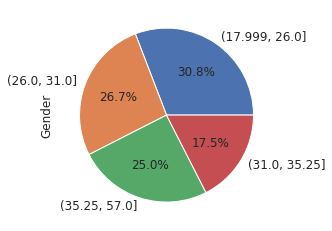

In [120]:
age_df['quartile'] = pd.qcut(age_df['AGE (YRS)'], q=4)
age_df['quartile'].value_counts().plot(kind='pie',autopct="%.1f%%", fontsize=12, label="Gender")


In [129]:
age_pie = pd.qcut(age_df['AGE (YRS)'], q=4).to_frame()
age_pie.head()
age_pie.value_counts()
print(type(age_pie))

<class 'pandas.core.frame.DataFrame'>


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

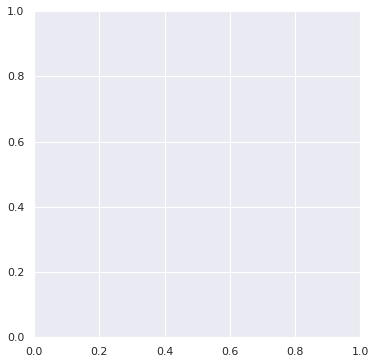

In [127]:
pie2, ax2 = plt.subplots(figsize=[10,6])
age_labels = age_pie.keys()
plt.pie(x=age_pie, autopct='%.1f%%', labels = age_labels, pctdistance = 0.6)

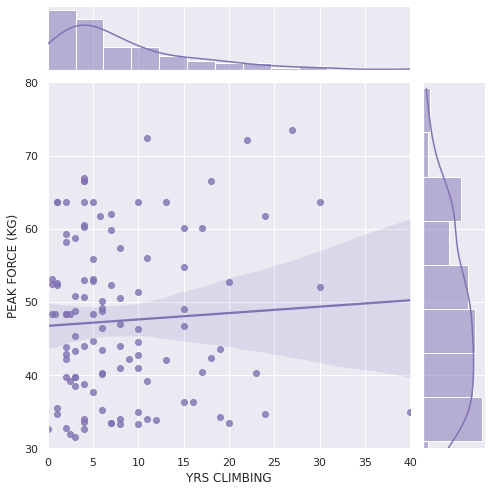

In [88]:

sns.set_theme(style="darkgrid")

g = sns.jointplot(x="YRS CLIMBING", y="PEAK FORCE (KG)", data=dataframe,
                  kind="reg", truncate=False,
                  xlim=(0, 40), ylim=(30, 80),
                  color="m", height=7)


## Climbing Discipline Sport vs Bouldering

In [89]:
disciplines_df = dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']]
